In [1]:
import numpy as np
import pandas as pd

In [2]:
p,f = "class.csv","zoo.csv"

In [3]:
data,classi = pd.read_csv(f),pd.read_csv(p)

In [4]:
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
classi

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [6]:
y_verita = data['class_type'].to_numpy() ###questo è l'array verità in base al quale confrontare i vari risultati di clustering 
print(y_verita)


[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


In [7]:
from collections import defaultdict


In [8]:
D = defaultdict(lambda:0)  
for item in y_verita:
    D[item] += 1
for k,v in D.items():
    print (k,v)

1 41
4 13
2 20
7 10
6 8
5 4
3 5


# Preprocessing

In [9]:
X = data.drop(['animal_name']+['class_type'],axis=1)
###Eliminiamo dal dataframe i nomi degli animali che sono una variabile categorica e la classe di appartenenza che 
###vogliamo trovare con gli algoritmi di clustering

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
###come sappiamo applicando uno scaler otteniamo un oggetto numpy, perciò ricreiamo il dataframe utilizzando gli indici di colonna originali

In [12]:
Xs
###Come abbiamo visto il nostro dataset non contiene valori nulli e tutti gli attributi hanno valori booleani 1 o 0 
###a eccezione della colonna legs, perciò ho apllicato MinMaxScaler per scalare i valori in modo che anche legs 
###assuma valori tra 0 e 1.
###A questo punto i dati sono pronti per applicare gli algoritmi di clustering

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


# Clustering

Kmeans

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 7)

In [22]:
y_pred_k = kmeans.fit_predict(Xs)
print(y_pred_k)

[0 0 3 0 0 0 0 3 3 6 0 5 3 4 4 4 5 0 3 0 5 5 0 5 1 2 2 6 0 0 1 0 0 5 3 6 6
 5 3 1 1 5 1 5 0 0 4 0 0 0 0 1 2 4 0 0 5 5 5 5 3 3 2 0 0 0 0 0 0 0 0 5 2 3
 0 0 3 4 5 5 2 1 3 5 6 4 3 5 1 2 5 2 3 6 6 5 0 1 0 1 5]


AffinityPropagation ### A quanto ho letto non c'è un modo per dirgli quanti cluster creare quindi questo algoritmo non è utilizzabile

In [17]:
from sklearn.cluster import AffinityPropagation
affp = AffinityPropagation(damping=0.75,random_state=0,)

In [23]:
y_pred_affp =affp.fit_predict(Xs)
print(y_pred_affp)
####Qui ha creato 9 cluster anzichè 7 (da rifare correggendo parametri)

[2 0 1 2 2 0 0 1 1 0 2 8 1 3 3 3 8 0 1 6 8 8 0 8 4 5 5 0 0 2 4 0 0 8 1 0 0
 8 1 4 4 7 4 8 2 2 3 2 2 2 2 4 5 3 2 0 7 8 7 8 1 1 5 2 2 0 6 2 2 2 0 7 4 1
 6 6 1 3 8 8 5 4 1 8 0 3 1 8 4 5 7 5 1 0 0 7 0 4 2 4 8]


# Results visualization

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [44]:
pca = PCA(2)
Xv = pca.fit_transform(Xs)

### Applichiamo la principal component analysis per comprimere i dati in due dimensioni e poterli visualizzare.

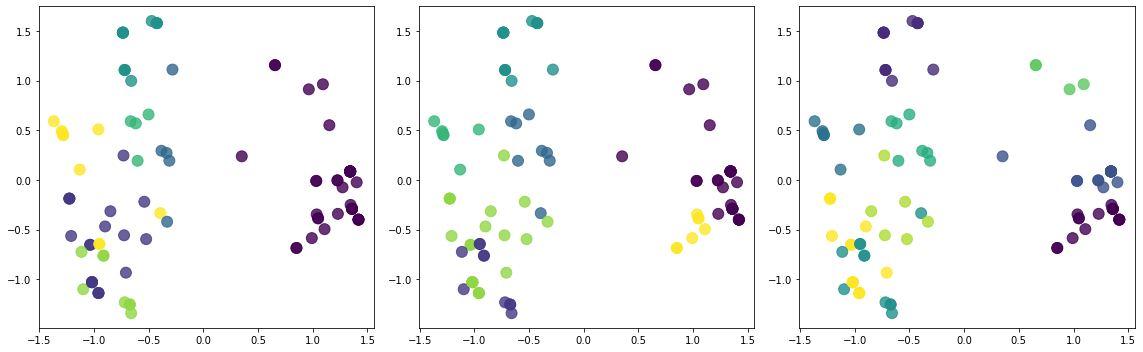

In [42]:
fig, ax = plt.subplots(figsize=(16,5),ncols=3, nrows=1)
ax[0].scatter(Xv[:,0],Xv[:,1], alpha=0.8, s=120, c=y_verita)###classificazione reale
ax[1].scatter(Xv[:,0],Xv[:,1], alpha=0.8, s=120, c=y_pred_k)###classificazione kmeans
ax[2].scatter(Xv[:,0],Xv[:,1], alpha=0.8, s=120, c=y_pred_affp)###classificazione affg con 9 cluster da rifare

plt.tight_layout()
plt.show()

### Visualizziamo i diversi risultati di clustering sulle coordinate dei nostri animali portate in 2 dimensioni.
### Ci rendiamo subito conto confrontando i primi due grafici che siamo lontani da un buon risultato

# Benchmark e interpretazione